# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [1]:
from sklearn.datasets import make_blobs

In [91]:
X, y = make_blobs(n_samples=1200, centers=7, n_features=8, random_state=1, cluster_std=8)

In [92]:
X.shape

(1200, 8)

In [93]:
y.shape

(1200,)

❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

In [94]:
import matplotlib.pyplot as plt

In [95]:
import pandas as pd

In [96]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,-9.983452,-6.813585,-1.803034,6.505192,9.449461,11.453562,2.507279,17.188678
1,12.857893,-5.683921,-16.395622,-11.026596,14.719776,-6.152879,7.407416,-3.596056
2,11.289337,12.724168,-13.074863,-16.300011,-10.331541,7.369573,7.112812,-1.862849
3,5.502440,-6.358943,0.271810,12.366895,-8.898767,-3.006504,-8.959976,16.158835
4,-13.791838,3.194847,-4.009333,-8.466332,-10.430255,2.237886,14.399150,9.520094
...,...,...,...,...,...,...,...,...
1195,-4.109192,11.030287,-8.156955,2.142741,-8.843507,-9.759293,-4.782305,0.191628
1196,11.382324,1.034699,10.539370,-7.583568,-6.035332,9.243585,-9.114250,-0.156599
1197,-26.577781,1.699297,0.923308,5.093832,-12.928930,7.209062,-21.772881,6.774097
1198,0.712856,21.720788,1.071118,-14.138434,-8.069240,-3.117596,-22.010744,4.950671


In [97]:
pd.DataFrame(y)

,0
0,2
1,2
2,5
3,1
4,2
...,...
1195,0
1196,4
1197,1
1198,3


In [98]:
X[:,0].shape

(1200,)

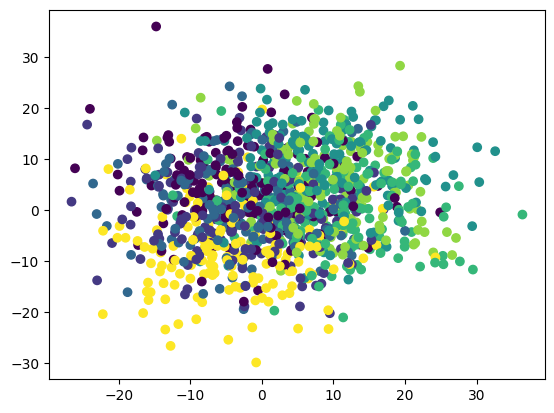

In [99]:
plt.scatter(X[:,0], X[:,1], c=y)

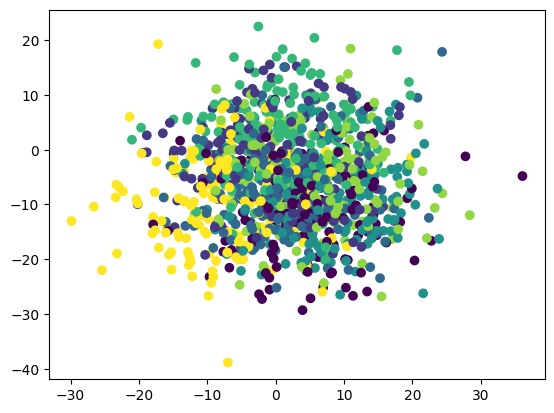

In [100]:
plt.scatter(X[:,1], X[:,2], c=y)

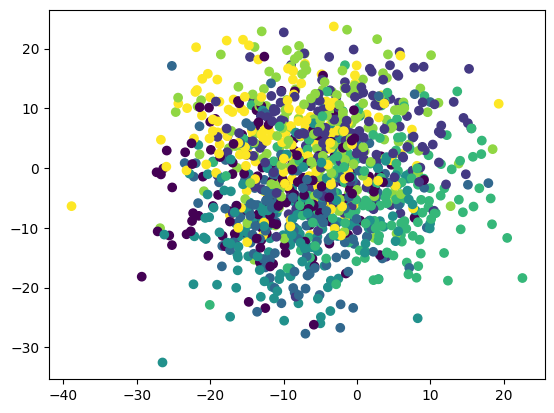

In [101]:
plt.scatter(X[:,2], X[:,3], c=y)

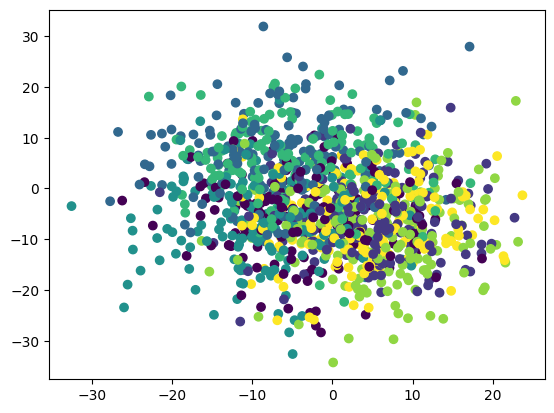

In [102]:
plt.scatter(X[:,3], X[:,4], c=y)

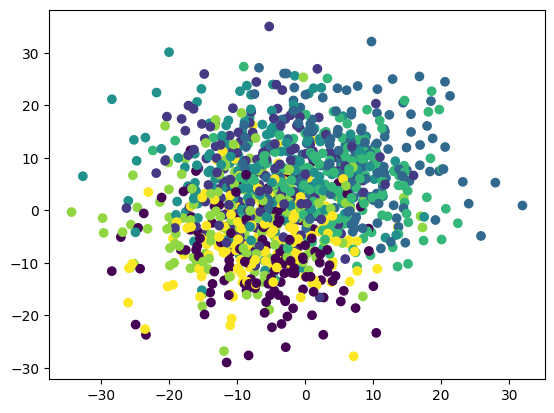

In [103]:
plt.scatter(X[:,4], X[:,5], c=y)

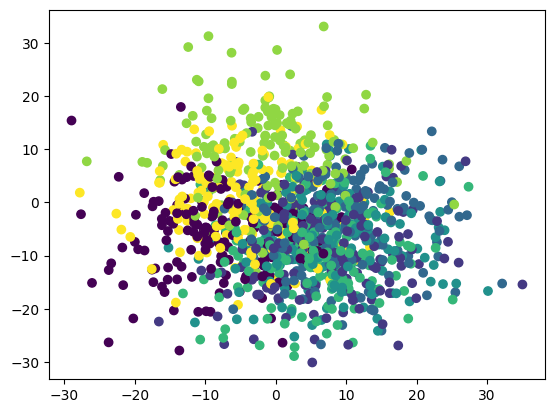

In [104]:
plt.scatter(X[:,5], X[:,6], c=y)

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

In [105]:
# YOUR CODE HERE

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [106]:
# YOUR CODE HERE
from tensorflow.keras import models
from tensorflow.keras import layers

In [107]:
from tensorflow.keras.utils import to_categorical

In [108]:
y

array([2, 2, 5, ..., 1, 3, 0])

In [109]:
y_cat = to_categorical(y, num_classes=7)

In [110]:
y_cat.shape

(1200, 7)

In [111]:
y_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
ss = StandardScaler()

In [127]:
ss.fit(X_train)

StandardScaler()

In [128]:
X_train_transformed = ss.transform(X_train)

In [129]:
ss.fit(X_test)

StandardScaler()

In [130]:
X_test_transformed = ss.transform(X_test)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [131]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=8))
    model.add(layers.Dense(7, activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 


model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [132]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 50)                450       
                                                                 
 dense_14 (Dense)            (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [133]:
X_train_transformed.shape

(840, 8)

In [134]:
y_train.shape

(840, 7)

In [135]:
model.fit(X_train_transformed, y_train, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 1.9900 - accuracy: 0.2036
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 1.7656 - accuracy: 0.3131
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 1.5871 - accuracy: 0.4476
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 1.4388 - accuracy: 0.5310
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 1.3135 - accuracy: 0.5964
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 1.2088 - accuracy: 0.6452
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 1.1224 - accuracy: 0.6583
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 1.0533 - accuracy: 0.6774
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.9987 - accuracy: 0.6845
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9549 - accuracy: 0.6857
Epoch 11/50
27/27 [

In [136]:
history = model.history

In [137]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

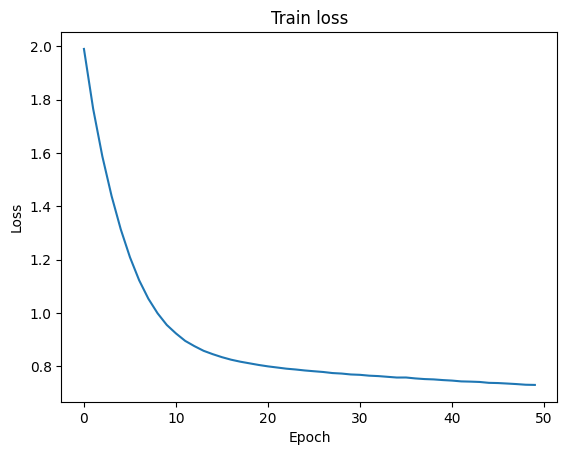

In [138]:
plot_history(history)

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [139]:
model.evaluate(X_test_transformed, y_test)


12/12 [==============================] - 0s 1ms/step - loss: 0.7836 - accuracy: 0.7139


[0.7835911512374878, 0.7138888835906982]

In [142]:
1/7

0.14285714285714285

❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [146]:
accuracy_baseline =  0.142

🧪 **Test your code**

In [147]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/jake/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/jake/code/jake-humphreys/data-multiclass-classification/tests
plugins: anyio-3.6.2, typeguard-2.13.3, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

In [148]:
model_1000 = initialize_model()

In [149]:
model_1000.fit(X_train_transformed, y_train, epochs=1000)

Epoch 1/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.9369 - accuracy: 0.1786
Epoch 2/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.7288 - accuracy: 0.3440
Epoch 3/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.5588 - accuracy: 0.4881
Epoch 4/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.4129 - accuracy: 0.5774
Epoch 5/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.2878 - accuracy: 0.6274
Epoch 6/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.1843 - accuracy: 0.6500
Epoch 7/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.0990 - accuracy: 0.6714
Epoch 8/1000
27/27 [==============================] - 0s 1ms/step - loss: 1.0324 - accuracy: 0.6869
Epoch 9/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.9809 - accuracy: 0.6917
Epoch 10/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.9410 - accuracy: 0.6976

27/27 [==============================] - 0s 993us/step - loss: 0.6922 - accuracy: 0.7512
Epoch 83/1000
27/27 [==============================] - 0s 933us/step - loss: 0.6927 - accuracy: 0.7476
Epoch 84/1000
27/27 [==============================] - 0s 904us/step - loss: 0.6919 - accuracy: 0.7500
Epoch 85/1000
27/27 [==============================] - 0s 955us/step - loss: 0.6900 - accuracy: 0.7524
Epoch 86/1000
27/27 [==============================] - 0s 950us/step - loss: 0.6895 - accuracy: 0.7536
Epoch 87/1000
27/27 [==============================] - 0s 903us/step - loss: 0.6894 - accuracy: 0.7488
Epoch 88/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.7464
Epoch 89/1000
27/27 [==============================] - 0s 926us/step - loss: 0.6872 - accuracy: 0.7548
Epoch 90/1000
27/27 [==============================] - 0s 913us/step - loss: 0.6855 - accuracy: 0.7583
Epoch 91/1000
27/27 [==============================] - 0s 979us/step - loss: 0.6845 - acc

27/27 [==============================] - 0s 920us/step - loss: 0.6296 - accuracy: 0.7714
Epoch 162/1000
27/27 [==============================] - 0s 925us/step - loss: 0.6295 - accuracy: 0.7667
Epoch 163/1000
27/27 [==============================] - 0s 977us/step - loss: 0.6288 - accuracy: 0.7619
Epoch 164/1000
27/27 [==============================] - 0s 927us/step - loss: 0.6265 - accuracy: 0.7714
Epoch 165/1000
27/27 [==============================] - 0s 899us/step - loss: 0.6259 - accuracy: 0.7738
Epoch 166/1000
27/27 [==============================] - 0s 949us/step - loss: 0.6257 - accuracy: 0.7679
Epoch 167/1000
27/27 [==============================] - 0s 960us/step - loss: 0.6247 - accuracy: 0.7738
Epoch 168/1000
27/27 [==============================] - 0s 959us/step - loss: 0.6232 - accuracy: 0.7738
Epoch 169/1000
27/27 [==============================] - 0s 922us/step - loss: 0.6242 - accuracy: 0.7750
Epoch 170/1000
27/27 [==============================] - 0s 901us/step - loss: 0

Epoch 240/1000
27/27 [==============================] - 0s 968us/step - loss: 0.5818 - accuracy: 0.7845
Epoch 241/1000
27/27 [==============================] - 0s 908us/step - loss: 0.5810 - accuracy: 0.7857
Epoch 242/1000
27/27 [==============================] - 0s 934us/step - loss: 0.5797 - accuracy: 0.7869
Epoch 243/1000
27/27 [==============================] - 0s 980us/step - loss: 0.5807 - accuracy: 0.7881
Epoch 244/1000
27/27 [==============================] - 0s 942us/step - loss: 0.5791 - accuracy: 0.7869
Epoch 245/1000
27/27 [==============================] - 0s 948us/step - loss: 0.5785 - accuracy: 0.7845
Epoch 246/1000
27/27 [==============================] - 0s 996us/step - loss: 0.5783 - accuracy: 0.7881
Epoch 247/1000
27/27 [==============================] - 0s 957us/step - loss: 0.5786 - accuracy: 0.7845
Epoch 248/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.7893
Epoch 249/1000
27/27 [==============================] - 0s 955us/s

27/27 [==============================] - 0s 944us/step - loss: 0.5466 - accuracy: 0.8000
Epoch 319/1000
27/27 [==============================] - 0s 891us/step - loss: 0.5470 - accuracy: 0.8048
Epoch 320/1000
27/27 [==============================] - 0s 892us/step - loss: 0.5459 - accuracy: 0.8000
Epoch 321/1000
27/27 [==============================] - 0s 926us/step - loss: 0.5447 - accuracy: 0.8036
Epoch 322/1000
27/27 [==============================] - 0s 945us/step - loss: 0.5454 - accuracy: 0.8012
Epoch 323/1000
27/27 [==============================] - 0s 918us/step - loss: 0.5466 - accuracy: 0.8071
Epoch 324/1000
27/27 [==============================] - 0s 932us/step - loss: 0.5437 - accuracy: 0.8107
Epoch 325/1000
27/27 [==============================] - 0s 919us/step - loss: 0.5428 - accuracy: 0.8000
Epoch 326/1000
27/27 [==============================] - 0s 928us/step - loss: 0.5420 - accuracy: 0.8060
Epoch 327/1000
27/27 [==============================] - 0s 954us/step - loss: 0

27/27 [==============================] - 0s 940us/step - loss: 0.5120 - accuracy: 0.8179
Epoch 397/1000
27/27 [==============================] - 0s 909us/step - loss: 0.5117 - accuracy: 0.8214
Epoch 398/1000
27/27 [==============================] - 0s 914us/step - loss: 0.5111 - accuracy: 0.8143
Epoch 399/1000
27/27 [==============================] - 0s 913us/step - loss: 0.5116 - accuracy: 0.8179
Epoch 400/1000
27/27 [==============================] - 0s 946us/step - loss: 0.5107 - accuracy: 0.8190
Epoch 401/1000
27/27 [==============================] - 0s 981us/step - loss: 0.5105 - accuracy: 0.8167
Epoch 402/1000
27/27 [==============================] - 0s 958us/step - loss: 0.5106 - accuracy: 0.8143
Epoch 403/1000
27/27 [==============================] - 0s 976us/step - loss: 0.5092 - accuracy: 0.8155
Epoch 404/1000
27/27 [==============================] - 0s 938us/step - loss: 0.5093 - accuracy: 0.8155
Epoch 405/1000
27/27 [==============================] - 0s 925us/step - loss: 0

27/27 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.8226
Epoch 476/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8262
Epoch 477/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.8262
Epoch 478/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.8226
Epoch 479/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8262
Epoch 480/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.8298
Epoch 481/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.8226
Epoch 482/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.8286
Epoch 483/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.8250
Epoch 484/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.

27/27 [==============================] - 0s 987us/step - loss: 0.4570 - accuracy: 0.8310
Epoch 556/1000
27/27 [==============================] - 0s 994us/step - loss: 0.4548 - accuracy: 0.8357
Epoch 557/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.8310
Epoch 558/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8310
Epoch 559/1000
27/27 [==============================] - 0s 959us/step - loss: 0.4542 - accuracy: 0.8345
Epoch 560/1000
27/27 [==============================] - 0s 927us/step - loss: 0.4545 - accuracy: 0.8369
Epoch 561/1000
27/27 [==============================] - 0s 975us/step - loss: 0.4532 - accuracy: 0.8321
Epoch 562/1000
27/27 [==============================] - 0s 966us/step - loss: 0.4533 - accuracy: 0.8357
Epoch 563/1000
27/27 [==============================] - 0s 920us/step - loss: 0.4520 - accuracy: 0.8345
Epoch 564/1000
27/27 [==============================] - 0s 949us/step - loss: 0.452

27/27 [==============================] - 0s 865us/step - loss: 0.4299 - accuracy: 0.8512
Epoch 635/1000
27/27 [==============================] - 0s 993us/step - loss: 0.4298 - accuracy: 0.8440
Epoch 636/1000
27/27 [==============================] - 0s 950us/step - loss: 0.4301 - accuracy: 0.8488
Epoch 637/1000
27/27 [==============================] - 0s 909us/step - loss: 0.4282 - accuracy: 0.8500
Epoch 638/1000
27/27 [==============================] - 0s 928us/step - loss: 0.4307 - accuracy: 0.8476
Epoch 639/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8500
Epoch 640/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8488
Epoch 641/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8524
Epoch 642/1000
27/27 [==============================] - 0s 959us/step - loss: 0.4271 - accuracy: 0.8512
Epoch 643/1000
27/27 [==============================] - 0s 989us/step - loss: 0.4266 

27/27 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8607
Epoch 714/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8631
Epoch 715/1000
27/27 [==============================] - 0s 996us/step - loss: 0.4060 - accuracy: 0.8631
Epoch 716/1000
27/27 [==============================] - 0s 947us/step - loss: 0.4056 - accuracy: 0.8619
Epoch 717/1000
27/27 [==============================] - 0s 931us/step - loss: 0.4062 - accuracy: 0.8631
Epoch 718/1000
27/27 [==============================] - 0s 958us/step - loss: 0.4039 - accuracy: 0.8631
Epoch 719/1000
27/27 [==============================] - 0s 968us/step - loss: 0.4036 - accuracy: 0.8607
Epoch 720/1000
27/27 [==============================] - 0s 899us/step - loss: 0.4040 - accuracy: 0.8619
Epoch 721/1000
27/27 [==============================] - 0s 936us/step - loss: 0.4036 - accuracy: 0.8583
Epoch 722/1000
27/27 [==============================] - 0s 911us/step - loss: 0.403

27/27 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8738
Epoch 794/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8810
Epoch 795/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8786
Epoch 796/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8726
Epoch 797/1000
27/27 [==============================] - 0s 983us/step - loss: 0.3838 - accuracy: 0.8786
Epoch 798/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8786
Epoch 799/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8762
Epoch 800/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8738
Epoch 801/1000
27/27 [==============================] - 0s 990us/step - loss: 0.3813 - accuracy: 0.8750
Epoch 802/1000
27/27 [==============================] - 0s 986us/step - loss: 0.3840 - accura

27/27 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8810
Epoch 874/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8833
Epoch 875/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8845
Epoch 876/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8845
Epoch 877/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8833
Epoch 878/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8833
Epoch 879/1000
27/27 [==============================] - 0s 990us/step - loss: 0.3614 - accuracy: 0.8845
Epoch 880/1000
27/27 [==============================] - 0s 983us/step - loss: 0.3642 - accuracy: 0.8810
Epoch 881/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8833
Epoch 882/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy

27/27 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8940
Epoch 953/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8988
Epoch 954/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8869
Epoch 955/1000
27/27 [==============================] - 0s 970us/step - loss: 0.3443 - accuracy: 0.8964
Epoch 956/1000
27/27 [==============================] - 0s 962us/step - loss: 0.3436 - accuracy: 0.8905
Epoch 957/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8940
Epoch 958/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8940
Epoch 959/1000
27/27 [==============================] - 0s 970us/step - loss: 0.3427 - accuracy: 0.8940
Epoch 960/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8917
Epoch 961/1000
27/27 [==============================] - 0s 970us/step - loss: 0.3428 - accu

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [150]:
history_1000 = model_1000.history

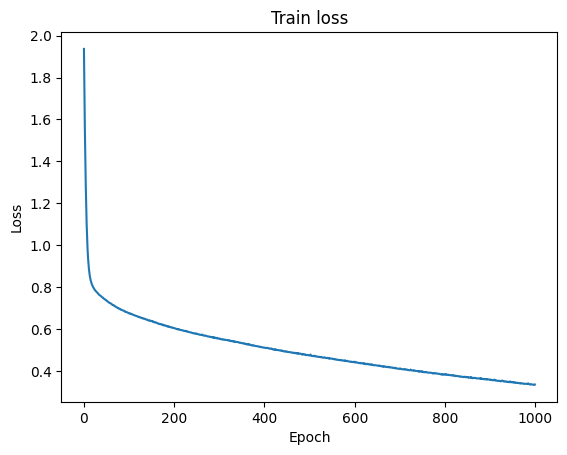

In [151]:
plot_history(history_1000)

In [152]:
model_1000.evaluate(X_test_transformed, y_test)

12/12 [==============================] - 0s 875us/step - loss: 1.3031 - accuracy: 0.6556


[1.303067922592163, 0.6555555462837219]

* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> Overfitting

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

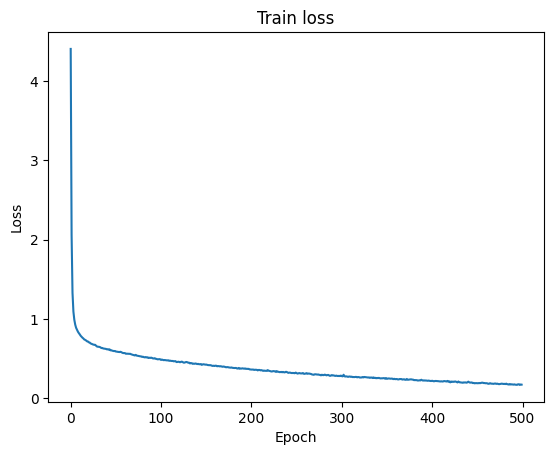

In [153]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plot_history(history)

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [ ]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [ ]:
# YOUR CODE HERE

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!